# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
import joblib

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [29]:
# Memuat dataset hasil clustering
file_path = 'hasil_clustering_DiamondsPrices.csv'
data = pd.read_csv(file_path)
print("Dataset berhasil dimuat!")
print(data.head())

Dataset berhasil dimuat!
   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   data_content_scaled content_category  Cluster  
0            -1.199402              Low        1  
1            -1.241651              Low        2  
2            -1.199402              Low        0  
3            -1.072656              Low        2  
4            -1.030407              Low        0  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [30]:
# 3. Preprocessing Data
# Encode kolom kategorikal
categorical_columns = ['carat', 'cut', 'color','clarity','depth','table','price','x','y','z']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Memilih Fitur dan Label
features = ['carat', 'data_content_scaled', 'table'] + categorical_columns
X = data[features]
y = data['Cluster']

# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi Data Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tampilkan Bentuk Data
print("Shape of X_train\t:", X_train.shape)
print("Shape of X_test\t\t:", X_test.shape)
print("Shape of y_train\t:", y_train.shape)
print("Shape of y_test\t\t:", y_test.shape)


Shape of X_train	: (41536, 13)
Shape of X_test		: (10385, 13)
Shape of y_train	: (41536,)
Shape of y_test		: (10385,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [31]:
from sklearn.svm import SVC
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Suport Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**1. Random Forest**
Random Forest adalah algoritma ensemble learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan membangun banyak pohon keputusan (decision trees) dan menggabungkan hasil prediksi dari setiap pohon untuk mendapatkan prediksi akhir.

**Cara Kerja:**

- Membuat Banyak Pohon Keputusan: Random Forest membuat banyak pohon keputusan dengan menggunakan bootstrap aggregating (bagging). Bagging adalah teknik ensemble di mana setiap pohon dilatih pada subset data latih yang dipilih secara acak dengan penggantian (random sampling with replacement).
- Feature Randomness: Selain bagging, Random Forest juga menggunakan feature randomness, di mana setiap pohon hanya menggunakan subset fitur yang dipilih secara acak untuk setiap node dalam pohon. Hal ini mengurangi korelasi antar pohon dan meningkatkan diversitas model, sehingga mengurangi overfitting.
- Menggabungkan Prediksi: Untuk membuat prediksi, Random Forest menggabungkan prediksi dari semua pohon keputusan. Dalam klasifikasi, prediksi akhir ditentukan melalui voting mayoritas (kelas yang paling banyak diprediksi oleh pohon-pohon). Dalam regresi, prediksi akhir adalah rata-rata dari prediksi semua pohon.

**Keunggulan:**

- Performa tinggi: Random Forest umumnya memiliki performa yang sangat baik dalam tugas klasifikasi dan regresi.
- Robust terhadap overfitting: Bagging dan feature randomness membantu mengurangi overfitting dan meningkatkan generalisasi model.
- Mampu menangani data dengan banyak fitur: Random Forest dapat menangani data dengan banyak fitur, bahkan fitur yang tidak relevan.
- Memberikan estimasi pentingnya fitur: Random Forest dapat memberikan informasi tentang pentingnya setiap fitur dalam model.

**2. Support Vector Machine (SVM)**

Support Vector Machine (SVM) adalah algoritma machine learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan mencari hyperplane optimal yang memisahkan data ke dalam kelas-kelas yang berbeda.

**Cara Kerja:**
- Mencari Hyperplane Optimal: SVM mencari hyperplane yang memaksimalkan margin (jarak) antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut support vectors.
- Kernel Trick: Untuk data yang tidak dapat dipisahkan secara linear, SVM menggunakan kernel trick untuk memetakan data ke ruang dimensi yang lebih tinggi di mana data dapat dipisahkan secara linear.
- Klasifikasi: Setelah hyperplane optimal ditemukan, data baru diklasifikasikan berdasarkan posisi relatifnya terhadap hyperplane.

**Keunggulan:**
- Efektif pada data dimensi tinggi: SVM dapat bekerja dengan baik pada data dengan banyak fitur.
Robust terhadap outliers: Karena SVM hanya bergantung pada support vectors, algoritma ini relatif robust terhadap outliers.
- Versatile: SVM dapat digunakan dengan berbagai kernel functions untuk menangani berbagai jenis data.
- Performa tinggi: SVM umumnya memiliki performa yang baik dalam tugas klasifikasi dan regresi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest Evaluation:
Akurasi Model: 0.9999
F1-Score: 0.9999
Precision: 0.9999
Recall: 0.9999


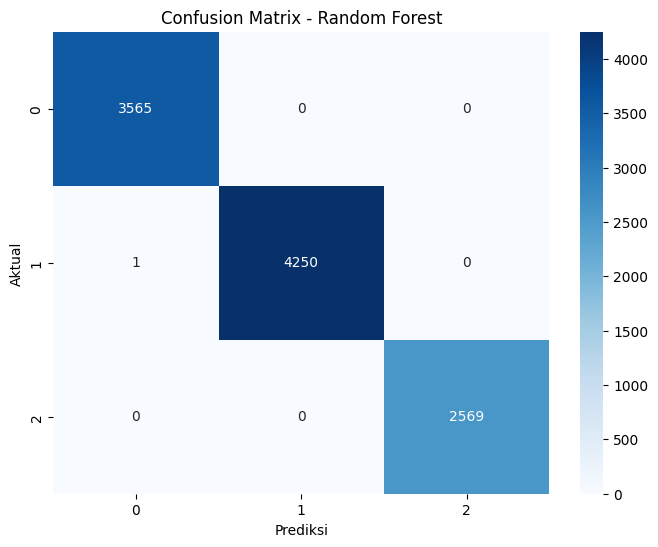


SVM Evaluation:
Akurasi Model: 0.9998
F1-Score: 0.9998
Precision: 0.9998
Recall: 0.9998


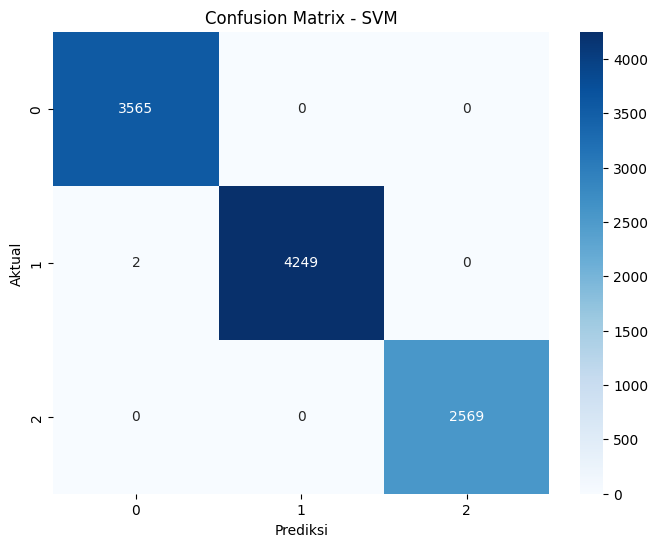

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

print("Random Forest Evaluation:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')


print(f"Akurasi Model: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Evaluation for SVM
print("\nSVM Evaluation:")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print(f"Akurasi Model: {accuracy_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - SVM')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [33]:
# Hyperparameter tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [34]:
# Menggunakan model terbaik dari GridSearchCV
best_rf_model = grid_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluasi ulang model Random Forest
print("Tuned Random Forest - Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Tuned Random Forest - F1 Score:", f1_score(y_test, y_pred_best_rf, average='weighted'))

Tuned Random Forest - Accuracy: 0.9999037072701011
Tuned Random Forest - F1 Score: 0.9999037083581882


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [38]:
# Confusion Matrix dan Classification Report untuk kedua model
print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print("\nConfusion Matrix - Logistic Regression")
print(confusion_matrix(y_test, y_pred_svm))

# Analisis hasil dengan Classification Report
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_pred_svm))


Confusion Matrix - Random Forest
[[3565    0    0]
 [   1 4250    0]
 [   0    0 2569]]

Confusion Matrix - Logistic Regression
[[3565    0    0]
 [   2 4249    0]
 [   0    0 2569]]

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3565
           1       1.00      1.00      1.00      4251
           2       1.00      1.00      1.00      2569

    accuracy                           1.00     10385
   macro avg       1.00      1.00      1.00     10385
weighted avg       1.00      1.00      1.00     10385


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3565
           1       1.00      1.00      1.00      4251
           2       1.00      1.00      1.00      2569

    accuracy                           1.00     10385
   macro avg       1.00      1.00      1.00     10385
weighted avg       1.00  

**1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:**

Dari hasil output terlihat bahwa baik Random Forest maupun SVM mencapai akurasi dan F1-score sempurna (1.0) sebelum dan sesudah tuning. Hal ini menunjukkan bahwa model sudah sangat baik dalam memprediksi kelas pada data yang diberikan, dan tuning tidak memberikan peningkatan signifikan.

**1. Identifikasi Kelemahan Model:**

- Overfitting: Meskipun model mencapai performa sempurna pada data uji, perlu diwaspadai kemungkinan overfitting. Overfitting terjadi ketika model terlalu kompleks dan menghafal data latih, sehingga tidak dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.
- Data Uji Tidak Representatif: Data uji yang digunakan mungkin tidak sepenuhnya mewakili seluruh variasi data di dunia nyata. Performa sempurna pada data uji tidak menjamin performa yang sama di lingkungan produksi.

**Precision dan Recall**

Precision dan recall untuk semua kelas bernilai 1.0. Ini berarti model mampu memprediksi semua kelas dengan benar, dan tidak ada kesalahan prediksi (False Positive atau False Negative).

**Confusion Matrix:**

Confusion matrix untuk kedua model menunjukkan bahwa semua nilai berada pada diagonal utama, yang mengindikasikan tidak ada kesalahan prediksi.

**3. Rekomendasi Tindakan Lanjutan**

**Evaluasi dengan Data yang Lebih Banyak dan Beragam:**
Kumpulkan data tambahan yang lebih representatif dan beragam untuk menguji model secara lebih komprehensif. Pastikan data tersebut mencakup berbagai skenario dan variasi yang mungkin ditemui di dunia nyata.

**Cross-Validation:**

Gunakan teknik cross-validation, seperti k-fold cross-validation, untuk mengevaluasi model pada subset data latih yang berbeda. Hal ini dapat membantu mendeteksi overfitting dan memberikan estimasi performa model yang lebih robust.

**Regularisasi:**

Meskipun model sudah mencapai performa sempurna, Anda dapat mencoba menambahkan regularisasi pada model untuk mencegah overfitting. Untuk Random Forest, Anda dapat mencoba mengurangi max_depth atau meningkatkan min_samples_split. Untuk SVM, Anda dapat mencoba menyesuaikan parameter C atau menggunakan kernel yang berbeda.

**Pengujian pada Data Real:**

Setelah melakukan langkah-langkah di atas, uji model pada data real untuk melihat performa sebenarnya di lingkungan produksi.

**Kesimpulan:**

Meskipun Random Forest dan SVM mencapai performa sempurna pada data uji, penting untuk tetap waspada terhadap overfitting dan memastikan data uji representatif. Rekomendasi tindakan lanjutan di atas dapat membantu Anda memvalidasi model lebih lanjut dan meningkatkan kepercayaan terhadap kemampuan generalisasinya.